In [1]:
import math
from wise_light_curves import *
from astropy.io import ascii
from astropy.table import Table, vstack, join
from astropy.coordinates import SkyCoord
from astropy import units as u
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.lines import Line2D
ascii.core.TableOutputter.default_converters[0] = ascii.core.convert_numpy(np.int64)

In [2]:
ra=123.84690712734611
dec= -38.989891107910346

In [3]:
#coordinate converter unit
c = SkyCoord(ra*u.degree, dec*u.degree)
hms, dms =c.ra.hms, c.dec.dms
#c.to_string('decimal')
#c.to_string('dms')
#c.to_string('hmsdms')
designation= 'J' + SkyCoord(ra*u.degree, dec*u.degree).to_string('hmsdms', sep='', precision=2).replace(" ", "")
#print(designation)

In [4]:
download_single_data(name=designation, ra=ra, dec=dec, root_path='ipac/', radius=2.)

In [5]:
#copy_paste the file name here...
allwise = ascii.read('ipac/%s_allwise.ipac' %designation, format='ipac') 
neowise = ascii.read('ipac/%s_neowise.ipac' %designation, format='ipac') 

In [45]:
#this removes isolated detections and data after the event
neowise = neowise[neowise['mjd'] !=56784.17509951]
neowise = neowise[neowise['mjd'] !=56975.18644457]
neowise = neowise[neowise['mjd'] !=56975.25215103]
neowise = neowise[neowise['mjd'] !=57713.22562596]
neowise = neowise[neowise['mjd'] !=57713.22575332]
neowise = neowise[neowise['mjd'] !=58072.89808159]
neowise = neowise[neowise['mjd'] <58100]

58072.89808159

In [47]:
allwise, neowise = only_good_data_v1(allwise, neowise)
full_wise_data = join(allwise, neowise, join_type = 'outer')

In [50]:
neowise.sort('mjd'), allwise.sort('mjd')

(None, None)

In [48]:
#this will figure out the each epoch
t = full_wise_data['mjd']
t.sort()

diff = [y - x for x, y in zip(*[iter(t)] * 2)]
avg = sum(diff) / len(diff)

epoch = [[t[0]]]

for x in t[1:]:
    if x - epoch[-1][0] < avg:
        epoch[-1].append(x)
    else:
        epoch.append([x])

epochs = len(epoch)
rows = math.ceil(epochs /6)
        
#print(epoch[9])

[58071.91617806, 58071.98162984, 58072.04708157, 58072.11253336, 58072.17798505]


In [49]:
plt.rcParams.update({
    'font.size': 12,
    'axes.edgecolor': 'black',
    'xtick.color':    'black',
    'ytick.color':    'black',
    'axes.labelcolor':'black',
    'axes.spines.right':True,
    'axes.spines.top':  True,
    'axes.spines.left': True,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 1,
    'xtick.minor.size': 1,
    'ytick.major.size': 1,
    'ytick.minor.size': 1,
    'xtick.major.pad': 1,
    'xtick.minor.pad': 1,
    'ytick.minor.pad': 1,
    'axes.ymargin' : 0,
    'axes.xmargin' : 0.01,
    'axes.grid': True,
    'figure.subplot.hspace': 0.4,
    'figure.figsize': (20,6),
    'lines.linewidth':  1,
    'xtick.labeltop': False   # draw label on the top
})

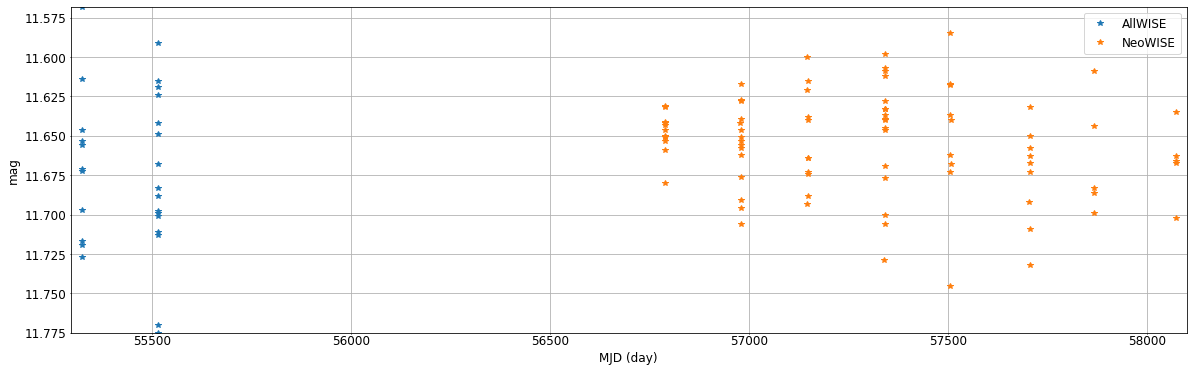

In [51]:
plt.figure()
plt.plot(allwise['mjd'], allwise['w1mpro_ep'],'*', label='AllWISE')
plt.plot(neowise['mjd'], neowise['w1mpro'],'*', label='NeoWISE')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('MJD (day)')
plt.ylabel('mag')
plt.show()

(55209.4629175, 55210.32308920001)

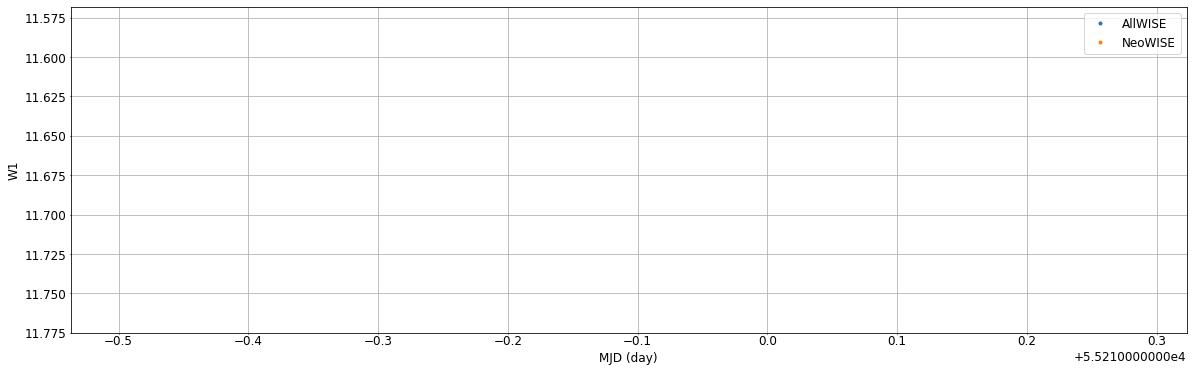

In [52]:
plt.figure()
plt.plot(allwise['mjd'], allwise['w1mpro_ep'], '.', label='AllWISE')
plt.plot(neowise['mjd'], neowise['w1mpro'], '.', label='NeoWISE')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('MJD (day)')
plt.ylabel('W1')
plt.xlim(55209.4129175 +0.05, 55210.2730892+0.05)

In [53]:
from matplotlib.ticker import FormatStrFormatter

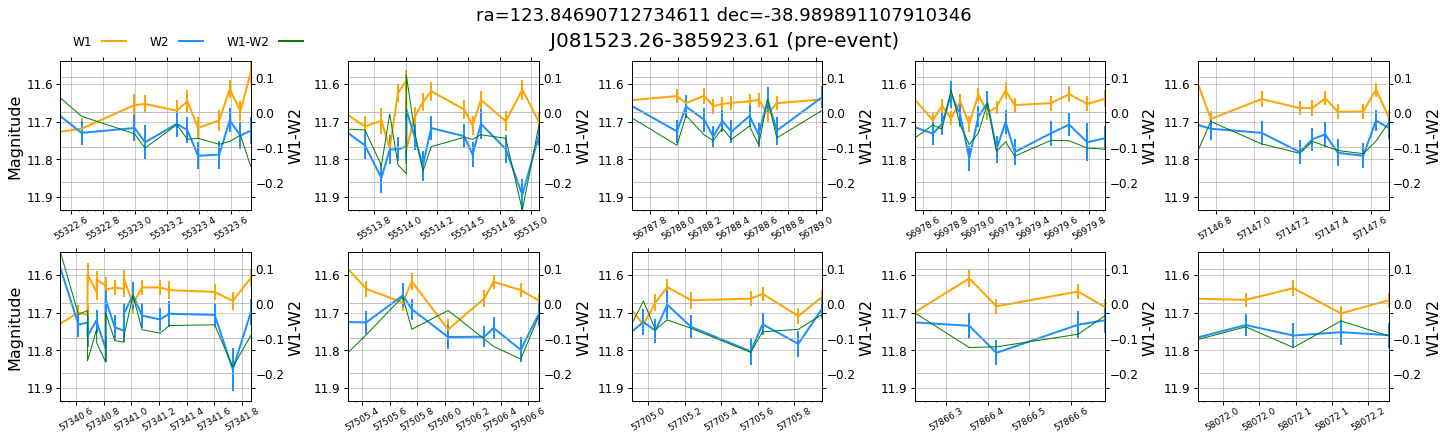

In [69]:
color1 ="orange"
color2 ="#1E90FF"
color3 ="orange"
color4 ="#1E90FF"

fig1, axes1 = plt.subplots(rows, 5, constrained_layout=True, sharey=False)
fig1.suptitle("ra=%s dec=%%s"%ra%dec, fontsize=18)

fig1.text(0.5, 0.90,"%s (pre-event)" %designation, transform=fig1.transFigure, fontsize=20, 
          horizontalalignment='center')

t = full_wise_data['mjd']
diff = [y - x for x, y in zip(*[iter(t)] * 2)]
avg = sum(diff) / len(diff)
epoch = [[t[0]]]

for x in t[1:]:
    if x - epoch[-1][0] < avg:
        epoch[-1].append(x)
    else:
        epoch.append([x])

lst = iter(epoch)


for i in range(rows):
    for j in range(5):
        a = axes1[i, j]
        b = a.twinx()
        #b[].get_shared_y_axes().join(b[i,j])
        #b._make_twin_axes(sharey="b")

        #b.sharey=True
        a.errorbar(allwise['mjd'], allwise['w1mpro_ep'], yerr = allwise['w1sigmpro_ep'], linewidth=2, label='AllWISE W1', c= color1)
        a.errorbar(allwise['mjd'], allwise['w2mpro_ep'], yerr = allwise['w2sigmpro_ep'], linewidth=2, label='AllWISE W2', c= color2)
        a.errorbar(neowise['mjd'], neowise['w1mpro'], yerr = neowise['w1sigmpro'], linewidth=2, label='NeoWise W1', c=color3)
        a.errorbar(neowise['mjd'], neowise['w2mpro'], yerr = neowise['w2sigmpro'], linewidth=2, label='NeoWISE W2', c=color4)
        b.plot(allwise['mjd'], allwise['w1mpro_ep'] - allwise['w2mpro_ep'], 
                             label= 'W1-W2', c = 'green')
        b.plot(neowise['mjd'], neowise['w1mpro'] - neowise['w2mpro'], 
                              label= 'W1-W2', c = 'green')

        try:
            epoch = next(lst)
            a.set_xlim(min(epoch), max(epoch))
            a.invert_yaxis()
            a.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            a.tick_params(axis='x', labelrotation = 30, labelsize = 9)
            a.xaxis.set_minor_locator(AutoMinorLocator(4))
            a.yaxis.set_minor_locator(MultipleLocator(0.2))
            a.yaxis.set_major_locator(MultipleLocator(0.1))
            b.yaxis.set_major_locator(MultipleLocator(0.1))
            a.tick_params(top=True, bottom=True, left=True, right=True, direction='out', 
                          length=4, width=1, grid_color='grey', grid_alpha=0.5)
            b.set_ylabel('W1-W2', fontsize=16)


        except:
            print("no more epochs")
axes1[0,0].set_ylabel('Magnitude', fontsize=16)
axes1[1,0].set_ylabel('Magnitude', fontsize=16)

legend_elements = [Line2D([0], [0], color=color1, lw=2, label='W1'),
                   Line2D([0], [0], color=color2, lw=2, label='W2'),
                   Line2D([0], [0], color='green', lw=2, label='W1-W2')]

axes1[0,0].legend(bbox_to_anchor=(0, 1.0, 1.3, .2), handles=legend_elements, framealpha=0, 
                                markerfirst=False, ncol=3, borderaxespad=0.)
plt.draw()          
                   
plt.show()

In [ ]:
fig1.savefig(("figs/%s.png"%designation), facecolor='white', transparent=False)

In [ ]:
#